In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


In [2]:
mat = scipy.io.loadmat('ex3data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X = np.array((mat['X']))
y = np.array((mat['y']))
m, n = X.shape

print(X.shape, y.shape)

(5000, 400) (5000, 1)


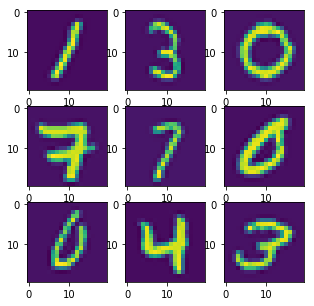

In [4]:
random_vec = np.random.randint(low=0, high=5000, size=9)
# plt.imshow(X[0,:].reshape((20,20)))

fig=plt.figure(figsize=(5, 5))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = X[random_vec[i-1],:].reshape((20,20), order='F') # Fortran ordering
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, aspect=1)
plt.show()

In [5]:
lam = 3
alpha = 0.5
iterations = 500
theta = np.array(([-2, -1, 1, 2])).reshape((4,1))

X_t = np.hstack((np.ones((5,1)), np.reshape(np.arange(1,16)/10, (5,3), order='F')))
y_t = np.array(([1, 0, 1, 0, 1])).reshape((5,1))


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [7]:
def gradient(x, y, theta, lam):
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    reg = np.vstack((0, theta[1:theta.shape[0]] * lam/m))
    grad = ((x.T).dot(h-y))/m + reg
    return grad

In [8]:
def cost(x, y, theta, lam):
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    
    reg = np.dot(theta.T,theta) * lam /(2*m)
    J = ((np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h))) /m).flatten() + reg
    # Calling the gradient within the cost function makes it easier for gradient descent to run
    grad = gradient(x, y, theta, lam)
    return J, grad

J, g = cost(X_t,y_t,theta,lam)

In [9]:
def gradient_descent(X,y, theta, alpha, iterations, lam):
    J_hist = []
    for i in range(iterations):
        J, grad = cost(X, y, theta, lam)
        theta = theta - (alpha * grad)
        J_hist.append(J)
    return theta, J_hist

# theta, J_hist = gradient_descent(X, y, theta, alpha, iterations, lam)
